# Decision Tree Classification

## Importing the libraries

In [33]:
# 20/12/2023
# IDE: VSC
# Section 22: Random Forest Classification
# Video [215, 216]
# Comments origin: logistic_regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [34]:
dataset = pd.read_csv('Social_Network_Ads.csv')

# [rows, columns]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split

# we changed the test_size = 0.25 in order to have an X_train of 0.75*400 = 300 (round numbers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [37]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [38]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [39]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# we can scale the whole matrix
# fit_transform for all the variables that are not dummy variables in X_train
# fit: will get the mean and standard deviation of each feature
# transform: applies the standardization formula so that all values can be in the same scale
X_train = sc.fit_transform(X_train)

# The features of the test set need to be scaled by the same scaler that was used on the training set
# You use transform on the test set without re-fitting the scaler. Reusing the parameters learned 
# from the training set helps maintain the same scale and prevents introducing information from the
# test set into the training process.
X_test = sc.transform(X_test)

In [41]:
print(X_train)

[[ 0.58 -0.89]
 [-0.61  1.46]
 [-0.01 -0.57]
 [-0.61  1.9 ]
 [ 1.37 -1.41]
 [ 1.47  1.  ]
 [ 0.09 -0.8 ]
 [-0.01 -0.25]
 [-0.21 -0.57]
 [-0.21 -0.19]
 [-0.31 -1.29]
 [-0.31 -0.57]
 [ 0.38  0.1 ]
 [ 0.88 -0.6 ]
 [ 2.07 -1.18]
 [ 1.08 -0.13]
 [ 0.68  1.78]
 [-0.71  0.56]
 [ 0.78  0.36]
 [ 0.88 -0.54]
 [-1.2  -1.58]
 [ 2.17  0.94]
 [-0.01  1.23]
 [ 0.19  1.08]
 [ 0.38 -0.48]
 [-0.31 -0.31]
 [ 0.98 -0.83]
 [ 0.98  1.87]
 [-0.01  1.26]
 [-0.9   2.27]
 [-1.2  -1.58]
 [ 2.17 -0.8 ]
 [-1.4  -1.47]
 [ 0.38  2.3 ]
 [ 0.78  0.77]
 [-1.   -0.31]
 [ 0.09  0.77]
 [-1.    0.56]
 [ 0.28  0.07]
 [ 0.68 -1.26]
 [-0.51 -0.02]
 [-1.8   0.36]
 [-0.71  0.13]
 [ 0.38  0.3 ]
 [-0.31  0.07]
 [-0.51  2.3 ]
 [ 0.19  0.04]
 [ 1.27  2.22]
 [ 0.78  0.27]
 [-0.31  0.16]
 [-0.01 -0.54]
 [-0.21  0.16]
 [-0.11  0.24]
 [-0.01 -0.25]
 [ 2.17  1.11]
 [-1.8   0.36]
 [ 1.87  0.13]
 [ 0.38 -0.13]
 [-1.2   0.3 ]
 [ 0.78  1.37]
 [-0.31 -0.25]
 [-1.7  -0.05]
 [-1.   -0.74]
 [ 0.28  0.5 ]
 [-0.11 -1.06]
 [-1.1   0.59]
 [ 0.09 -0

In [42]:
print(X_test)

[[-0.8   0.5 ]
 [-0.01 -0.57]
 [-0.31  0.16]
 [-0.8   0.27]
 [-0.31 -0.57]
 [-1.1  -1.44]
 [-0.71 -1.58]
 [-0.21  2.16]
 [-1.99 -0.05]
 [ 0.88 -0.77]
 [-0.8  -0.6 ]
 [-1.   -0.42]
 [-0.11 -0.42]
 [ 0.09  0.22]
 [-1.8   0.48]
 [-0.61  1.37]
 [-0.11  0.22]
 [-1.89  0.45]
 [ 1.67  1.75]
 [-0.31 -1.38]
 [-0.31 -0.65]
 [ 0.88  2.16]
 [ 0.28 -0.54]
 [ 0.88  1.03]
 [-1.5  -1.21]
 [ 1.08  2.07]
 [-1.    0.5 ]
 [-0.9   0.3 ]
 [-0.11 -0.22]
 [-0.61  0.48]
 [-1.7   0.53]
 [-0.11  0.27]
 [ 1.87 -0.28]
 [-0.11 -0.48]
 [-1.4  -0.34]
 [-1.99 -0.51]
 [-1.6   0.33]
 [-0.41 -0.77]
 [-0.71 -1.03]
 [ 1.08 -0.97]
 [-1.1   0.53]
 [ 0.28 -0.51]
 [-1.1   0.42]
 [-0.31 -1.44]
 [ 0.48  1.23]
 [-1.1  -0.34]
 [-0.11  0.3 ]
 [ 1.37  0.59]
 [-1.2  -1.15]
 [ 1.08  0.48]
 [ 1.87  1.52]
 [-0.41 -1.29]
 [-0.31 -0.36]
 [-0.41  1.32]
 [ 2.07  0.53]
 [ 0.68 -1.09]
 [-0.9   0.39]
 [-1.2   0.3 ]
 [ 1.08 -1.21]
 [-1.5  -1.44]
 [-0.61 -1.5 ]
 [ 2.17 -0.8 ]
 [-1.89  0.19]
 [-0.21  0.85]
 [-1.89 -1.26]
 [ 2.17  0.39]
 [-1.4   0

## Training the Decision Tree Classification model on the Training set

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier

# n_estimators: nº of trees in the forest
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting a new result

In [44]:
# predict expects a 2d array: [[]]
# prediction of the 1st customer in the X_test: [[30  87000]] --> 30 years, 87000 $
# y_test = 0 for this customer

print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [45]:
# origin: multiple_linear_regression.ipyng
# we now want to display the predicted results and the test results

y_pred = classifier.predict(X_test)
# precision = 2 --> 2 decimals
np.set_printoptions(precision=2)

# reshape(len(y_pred),1) --> display vertically
# axis can take 2 values (0, 1)
# --> 0: horizontal concatenation
# --> 1: vertical concatenation

# print(np.concatenate((y_pred, y_test), 0))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

# Left column (prediction) | Right column (test)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [46]:
# scikit-learn metrics module
from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
'''
                        Actual value: True   Actual value: False
Predicted value: True   True (TT)            False (FT)
Predicted value: False  False (TF)           True (FF)
'''

cm = confusion_matrix(y_test, y_pred)
print(cm)
# correct predictions of the class 0: 63 didn't buy
# correct predictions of the class 1: 28 did buy
# accuracy score = 63+28 / 63+28+5+4 = 91/100

accuracy_score(y_test, y_pred)

[[63  5]
 [ 4 28]]


0.91

## Visualising the Training set results

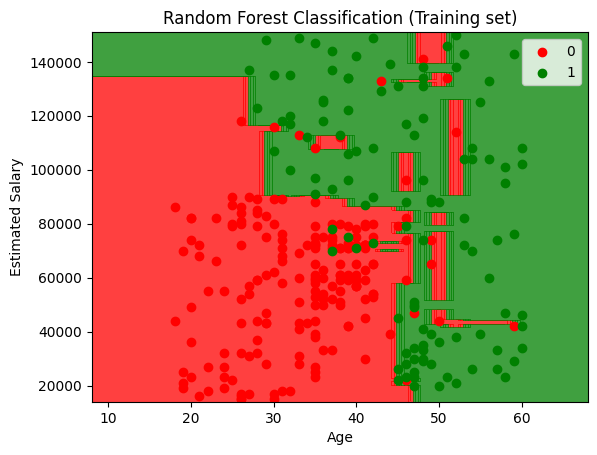

In [47]:
# the code in the visualization will almost never be used again (2 features dataset)
# tweaked with chatgpt in order to work

from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

# memory error: increase the step size
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=2),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=2))

# Use a single color for each class
colors = ['red', 'green']

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(colors))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=[colors[i]], label=j)

plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()

## Visualising the Test set results

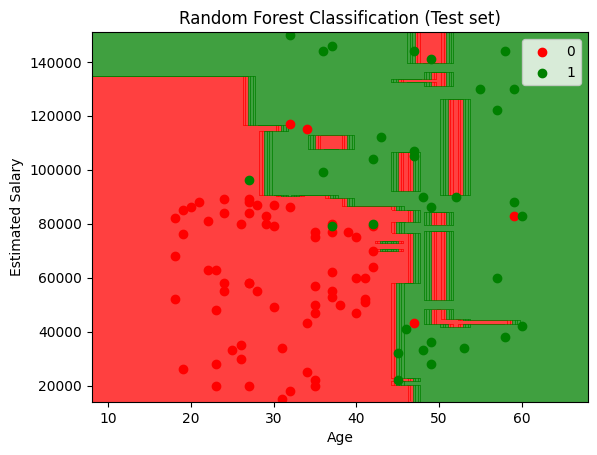

: 

In [48]:
# the code in the visualization will almost never be used again (2 features dataset)
# tweaked with chatgpt in order to work

from matplotlib.colors import ListedColormap

# memory error: increase the step size
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 2),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 2))

# Use a single color for each class
colors = ['red', 'green']

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap=ListedColormap(colors))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=[colors[i]], label=j)

plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()